---
># AFP_2022_2_K_10_Akropolisz Gépi tanulás framework
---
Hadobás Dávid (TB3376), Kardos Zsolt (O48WRX), Riczkó Henrik (D5GPJ6), Balogh Mihály Viktor (GUFVXA)
---

In [ ]:
import math, numpy, random
adatbazis_helye = "db.csv" #@param ["db.csv", "OR", "AND", "XOR"]
#@markdown --- 
algoritmus = 'C' #@param ["A", "B", "C"]
aktivaciosfgv = 'sigmoid' #@param ['tanh', 'sigmoid']
Bs = 0 #@param {type:"number"}
nnszelesseg = 4 #@param {type:"number"}
nnmagassag = 3 #@param {type:"number"}
sulymin = 5 #@param {type:"number"}
sulymax = 7 #@param {type:"number"}
print('Választott algoritmus: ', algoritmus)
print('Választott aktivációs függvény: ', aktivaciosfgv)
print('Választott BIAS: ', Bs)
print('Választott szélesség: ', nnszelesseg)
print('Választott magasság: ', nnmagassag)
print('Választott minimum súly: ', sulymin)
print('Választott maximum súly: ', sulymax)

Választott algoritmus:  C
Választott aktivációs függvény:  sigmoid
Választott BIAS:  0
Választott szélesség:  4
Választott magasság:  3
Választott minimum súly:  5
Választott maximum súly:  7


## Jelen állapotban az első kódblokkot a drop-down menük opciói kiválasztása után újra kell futtatni!!!!

In [ ]:
if aktivaciosfgv == 'tanh':
  def activation(x):
    return numpy.tanh(x)
  def dactivation(x):
    return 1.0 - x**2
elif aktivaciosfgv == 'sigmoid':
  def activation(x):
    return 1.0/(1.0 + numpy.exp(-x))
  def dactivation(x):
    return x*(1.0-x)

'''Bővíthetőség miatt maradnak elif-ek'''
if algoritmus == 'A':
  acti, dacti = activation, dactivation

  ''' Zsolti: Ide jöhet majd az adatbázis olvasás '''
  samples = [ [[0, 0], [0, 0, 0]], [[0, 1], [0, 1, 1]], [[1, 0], [0, 1, 1]], [[1, 1], [1, 1, 0]] ]  # AND / OR / XOR
  #samples = numpy.loadtxt(fname="db.csv", delimiter=",") //a CSV olvasáshoz
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if nnmagassag == 0:
    print('Magasság nem lehet 0')
  if nnszelesseg == 0:
    print('Szélesség nem lehet 0')
  if nnszelesseg<0:
    print('Szélesség nem lehet 0-nál kisebb')
  if nnmagassag<0:
    print('Magasság nem lehet 0-nál kisebb')
  B = Bs
  nn = [len(samples[0][0])+B, nnszelesseg, nnmagassag, len(samples[0][1])]
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  wl = [ numpy.random.random((nn[l+1], nn[l]))*sulymax-sulymin for l in range(len(nn)-1)] 
  delta = [numpy.zeros((nn[l+1])) for l in range(len(nn)-1)]

  epoch = 0
  sumerr = 1.0
  while sumerr>=0.01 and epoch<=10000:
    sumerr = 0.0
    epoch += 1
    for inp, out in samples:
        nl = [ numpy.array(inp + [1.0]*B) ]
        for l in range(len(nn)-1):
            nl.append(acti(numpy.dot(wl[l],nl[l])))
        error = out - nl[-1]
        for l in reversed(range(len(nn)-1)):
            if l == len(nn)-2:
                delta[l][:] = error*dacti(nl[-1])
            else:
                numpy.dot(delta[l+1],wl[l+1], out=delta[l])
                delta[l] *= dacti(nl[l+1])
            wl[l] += 0.5 * delta[l].reshape((nn[l+1],1))*nl[l].reshape((1,nn[l]))
        sumerr += sum(error**2)
  print (epoch,sumerr)
elif algoritmus == 'B':

  acti, dacti = activation, dactivation
  #Adatbázist ide - Henrik
  #samples = [[[0, 0], [0, 0]], [[0, 1], [0, 1]], [[1, 0], [0, 1]], [[1, 1], [1, 1]]]   # AND és OR
  samples = [ [[0, 0], [0, 0, 0]], [[0, 1], [0, 1, 1]], [[1, 0], [0, 1, 1]], [[1, 1], [1, 1, 0]] ]  # AND, OR és XOR
  #samples = numpy.loadtxt(fname="db.csv", delimiter=",") //a CSV olvasáshoz
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if nnmagassag == 0:
    print('Magasság nem lehet 0')
  if nnszelesseg == 0:
    print('Szélesség nem lehet 0')
  if nnszelesseg<0:
    print('Szélesség nem lehet 0-nál kisebb')
  if nnmagassag<0:
    print('Magasság nem lehet 0-nál kisebb')

  B = Bs
  nn = [len(samples[0][0])+B, nnszelesseg, nnmagassag, len(samples[0][1])]
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  wl=[ [ [random.random()*sulymax-sulymin for _ in range(nn[l])] for _ in range(nn[l+1])] for l in range(len(nn)-1)] 
  epoch = 0
  sumerr = 1.0
  while sumerr>=0.01 and epoch<=10000:
      sumerr = 0.0
      epoch += 1
      for inp, out in samples:
          nl = [ inp + [1.0]*B ]
          for l in range(len(nn)-1):
              nl.append([acti(sum([nl[l][i] * wl[l][j][i] for i in range(nn[l])])) for j in range(nn[l+1])])
              
          error = [out[j] - nl[-1][j] for j in range(nn[-1])]
          delta = [None for _ in range(len(nn)-1)]
          for l in reversed(range(len(nn)-1)):
              if l == len(nn)-2:
                  delta[l] = [error[j] * dacti(nl[-1][j]) for j in range(nn[-1])]
              else:
                  delta[l] = [sum([delta[l+1][j] * wl[l+1][j][i] for j in range(nn[l+2])])*dacti(nl[l+1][i]) for i in range(nn[l+1])]
              
              for i in range(nn[l]):
                  for j in range(nn[l+1]):
                      wl[l][j][i] += 0.5 * delta[l][j] * nl[l][i]

          sumerr += sum( [error[j]**2 for j in range(nn[-1])])
  print (epoch,sumerr)

elif algoritmus == 'C':
  acti, dacti = activation, dactivation
  if sulymax<0:
    print('Súlymax nem lehet 0-nál kisebb')
  if sulymin<0:
    print('Súlymin nem lehet 0-nál kisebb')
  if sulymax<sulymin:
    print('Súlymax nem lehet kisebb a súlymintól')
  w1 = [random.random()*sulymax-sulymin for _ in range(3)]
  #Adatbázist ide - Henrik
  #samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 1.0], [[1.0, 0.0], 1.0], [[1.0, 1.0], 1.0]] OR
  #samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 0.0], [[1.0, 0.0], 0.0], [[1.0, 1.0], 1.0]] #AND
  #samples = [[[0.0, 0.0], 0.0], [[0.0, 1.0], 1.0], [[1.0, 0.0], 1.0], [[1.0, 1.0], 0.0]] XOR
  samples =[sor.strip().split(sep=',') for sor in open("/content/db.csv")]
  for _ in range(100):
      sumerr = 0.0
      for inp, out in samples:
          x = inp + [1.0]
          y = acti(sum([x[i] * w1[i] for i in range(3)]))
          error = (out - y)
          delta = error * dacti(y)
          for i in range(3):
              w1[i] += 0.8 * delta * x[i]
          sumerr += (y-out)**2
      print (sumerr)

ValueError: ignored

Képfelismerés (Tensorflow)

In [12]:
presEpoch = 10 #@param {type:"number"}

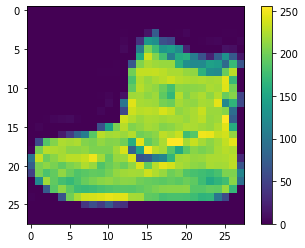

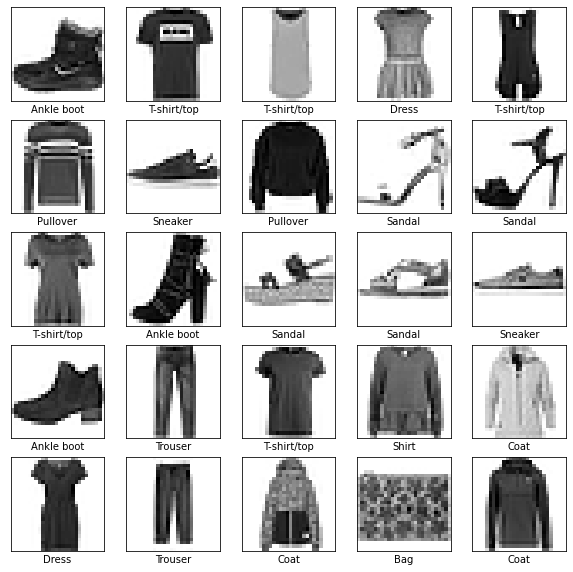

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4976 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3750 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3361 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3129 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2966 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2689 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2591 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2496 - accuracy: 0.9057
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

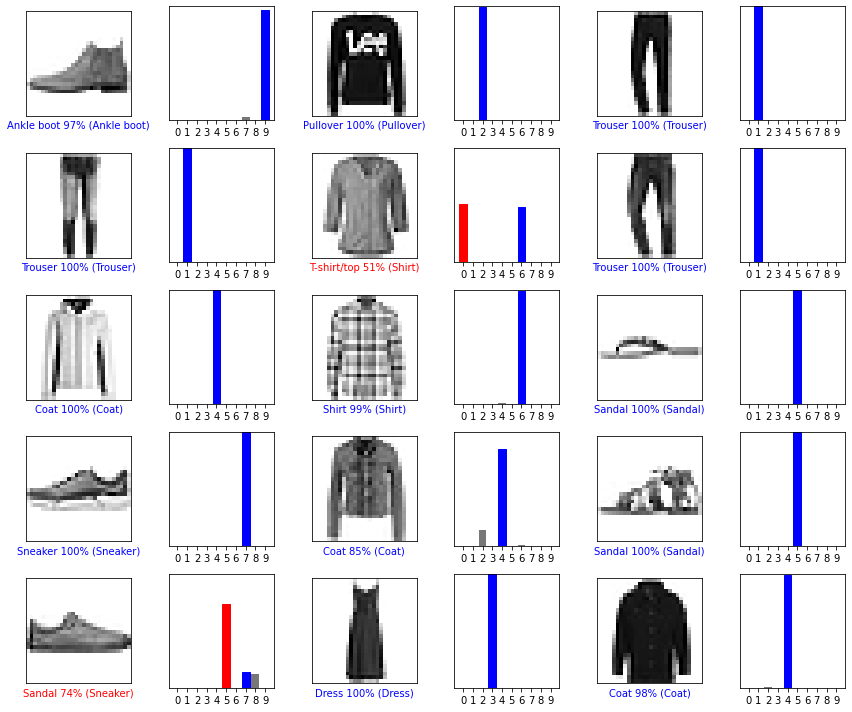

(28, 28)
(1, 28, 28)
[[6.2539519e-05 1.4020534e-11 9.9745828e-01 7.2128074e-11 2.4223272e-03
  5.7327793e-14 5.6880464e-05 1.5984387e-16 2.2429432e-10 1.8264356e-16]]


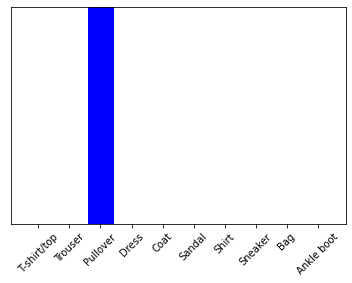

2

In [13]:
# Függőségek
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Használt osztályok
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
train_labels
test_images.shape

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=presEpoch)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

img = test_images[1]

print(img.shape)

img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

np.argmax(predictions_single[0])

x-y reláció felismerő (tensorflow)

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

model.fit(xs, ys, epochs=500)

print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 0s 364ms/step - loss: 56.9283
Epoch 2/500
1/1 [==============================] - 0s 9ms/step - loss: 44.7885
Epoch 3/500
1/1 [==============================] - 0s 13ms/step - loss: 35.2375
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 27.7232
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 21.8114
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 17.1602
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 13.5009
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 10.6219
Epoch 9/500
1/1 [==============================] - 0s 20ms/step - loss: 8.3569
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 6.5748
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 5.1728
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 4.0698
Epoch 13/500
1/1 [===========================

Időjárás előrejelzés

In [11]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go

# CSV beolvasás
df = pd.read_csv('https://github.com/bytehub-ai/blog-examples/raw/master/data/jena-temperature-data.csv.gz', parse_dates=[0])
df = df.set_index(df.columns[0])
df.head()

# Use 2019 data as test set, 2017/2018 for training
df_train = df[df.index < pd.Timestamp('2018-01-01')].drop(columns=['longitude', 'latitude'])
df_test = df[df.index >= pd.Timestamp('2018-01-01')].drop(columns=['longitude', 'latitude'])


# Plottoljuk ki az aktuális előrejekzést 2018-ra
#traces = [
#          go.Scatter(x=df_test.index, y=df_test['actual'], mode='lines', name='Actual'),
#          go.Scatter(x=df_test.index, y=df_test['surface_temperature_forecast'], mode='lines', name='Surface forecast'),
#          go.Scatter(x=df_test.index, y=df_test['2m_temperature_forecast'], mode='lines', name='2m forecast'),
#]
#fig = go.Figure(
#    data=traces,
#    layout={
#        'title': 'Jena temperature: actual and forecast',
#        'yaxis': {'title': 'Temperature, °C'},
#        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
#    },
#)
#fig


# A hibák histogramját kiplottoljuk
#traces = [
#          go.Histogram(x=df_test['surface_temperature_forecast'] - df_test['actual'], name='Error on surface forecast', histnorm='probability'),
#          go.Histogram(x=df_test['2m_temperature_forecast'] - df_test['actual'], name='Error on 2m forecast', histnorm='probability'),
#]
#fig = go.Figure(
#    data=traces,
#    layout={
#        'title': 'Forecast error',
#        'xaxis': {'title': 'Error, °C'},
#        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
#    },
#)
#fig



# Előrejelzés RMS-hibáinak kiszámítása.
from sklearn.metrics import mean_squared_error

def rms_error(y_true, y_predicted):
  return mean_squared_error(y_true.flatten(), y_predicted.flatten()) ** 0.5

print(f'RMS Error on surface forecast {rms_error(df_test["actual"].values, df_test["surface_temperature_forecast"].values):.2f} °C')
print(f'RMS Error on 2m height forecast {rms_error(df_test["actual"].values, df_test["2m_temperature_forecast"].values):.2f} °C')

from sklearn.linear_model import LinearRegression

df_train = df_train.assign(
    sine_time=np.sin(2 * np.pi * df_train.index.hour / 24),
    cosine_time=np.cos(2 * np.pi * df_train.index.hour / 24),
)
df_test = df_test.assign(
    sine_time=np.sin(2 * np.pi * df_test.index.hour / 24),
    cosine_time=np.cos(2 * np.pi * df_test.index.hour / 24),
)

df_train = df_train.assign(
    lagged_surface=df_train['surface_temperature_forecast'].shift(1),
    lagged_2m=df_train['2m_temperature_forecast'].shift(1),
).dropna()
df_test = df_test.assign(
    lagged_surface=df_test['surface_temperature_forecast'].shift(1),
    lagged_2m=df_test['2m_temperature_forecast'].shift(1),
).dropna()

X_vars = df_train.columns.difference(['actual'])
y_vars = ['actual']

X_train = df_train[X_vars].values
y_train = df_train[y_vars].values
X_test = df_test[X_vars].values
y_test = df_test[y_vars].values

model_lr = LinearRegression()
model_lr.fit(X=X_train, y=y_train)

y_predict_lr = model_lr.predict(X_test)
print(f'RMS Error on linear model forecast {rms_error(df_test["actual"].values, y_predict_lr):.2f} °C')


# Kiplottoljuk az előrejelzés RMS hibáit
#traces = [
#          go.Histogram(x=df_test['surface_temperature_forecast'] - df_test['actual'], name='Error on surface forecast', histnorm='probability'),
#          go.Histogram(x=df_test['2m_temperature_forecast'] - df_test['actual'], name='Error on 2m forecast', histnorm='probability'),
#          go.Histogram(x=y_predict_lr.flatten() - df_test['actual'], name='Error on ML-enhanced forecast', histnorm='probability'),
#]
#fig = go.Figure(
#    data=traces,
#    layout={
#        'title': 'Forecast error',
#        'xaxis': {'title': 'Error, °C'},
#        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
#    },
#)
#fig

# Bar chart of RMS errors
traces = [
          go.Bar(
              x=['Surface forecast', '2m height forecast', 'ML-enhanced forecast'],
              y=[
                 rms_error(df_test['actual'].values, df_test['surface_temperature_forecast'].values),
                 rms_error(df_test['actual'].values, df_test['2m_temperature_forecast'].values),
                 rms_error(df_test['actual'].values, y_predict_lr),
              ],
          ),
]
fig = go.Figure(
    data=traces,
    layout={
        'title': 'Forecast RMS error on each model',
        'yaxis': {'title': 'RMS Error, °C'},
        'margin': {'l': 10, 'r': 10, 't': 25, 'b': 10}, 'template': 'plotly_white'
    },
)
fig

RMS Error on surface forecast 2.92 °C
RMS Error on 2m height forecast 2.07 °C
RMS Error on linear model forecast 1.86 °C
